# Upper Confidence Bound (UCB)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [14]:
# Implementing the UCB

N = 10000 # total users
d = 10    # number of adds
add_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if numbers_of_selections[i] > 0:
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i 

    add_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

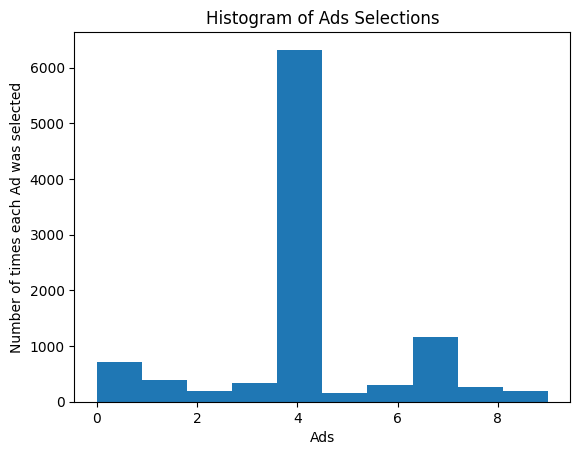

In [13]:
# Visualizing the results
plt.hist(add_selected)
plt.title("Histogram of Ads Selections")
plt.xlabel("Ads")
plt.ylabel("Number of times each Ad was selected")
plt.show()